In [181]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

df = pd.read_csv('BostonHousing.csv')
df.head(n=10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [182]:
# df.drop(columns=['CAT. MEDV'],inplace=True)
# df.dropna(inplace=True)
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [184]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [185]:
df.corr()['medv'].sort_values()

lstat     -0.737663
ptratio   -0.507787
indus     -0.483725
tax       -0.468536
nox       -0.427321
crim      -0.388305
rad       -0.381626
age       -0.376955
chas       0.175260
dis        0.249929
b          0.333461
zn         0.360445
rm         0.695360
medv       1.000000
Name: medv, dtype: float64

In [186]:


X = df.loc[:, df.columns != 'medv'].values  #or X = df.loc[:,['lstat','ptratio','rm]]
y = df.loc[:, df.columns == 'medv'].values  #or y = df.loc[:,'medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)

### Normalizing Training and Testing Data Set

In [187]:

scaler = StandardScaler() #standardise (Z-score normalization => mean = 0 and Std = 1)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

##### input_shape=(13,): This parameter defines the shape of the input data for the first layer. In this case, it expects input data with 13 features. 
##### activation='relu': This parameter specifies the activation function to be used in the layer. Activation functions introduce non-linearity to the network, enabling it to learn complex patterns. In this case, the Rectified Linear Unit (ReLU) activation function is used, which returns the input if it is positive and 0 otherwise.
##### optimizer='adam': This parameter specifies the optimization algorithm used during training. Adam (Adaptive Moment Estimation) is a popular optimization algorithm known for its efficiency and effectiveness in a wide range of deep learning tasks.

##### loss='mse': This parameter defines the loss function used to measure the difference between the predicted output and the true output during training. MSE (Mean Squared Error) is a common loss function for regression tasks that calculates the average squared difference between the predicted and true values.

##### metrics=['mae']: This parameter specifies the evaluation metric(s) used to monitor the model's performance during training. MAE (Mean Absolute Error) is a metric that measures the average absolute difference between the predicted and true values. It provides a measure of the model's accuracy.

``` Adam optimizer dynamically adjusts the learning rates for individual parameters in a neural network based on the history of gradients. This adaptive learning rate strategy helps improve the efficiency and robustness of the optimization process during training. ```

In [188]:

model = Sequential(layers=[Dense(128, input_shape=(13, ), activation='relu', name='dense_1'),Dense(64, activation='relu', name='dense_2'),Dense(1, activation='linear', name='dense_output')])


# model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_1'))
# model.add(Dense(64, activation='relu', name='dense_2'))
# model.add(Dense(1, activation='linear', name='dense_output'))

model.compile(optimizer='adam', loss='mse',metrics=['mae'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1792      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 10113 (39.50 KB)
Trainable params: 10113 (39.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [189]:
model.fit(X_train, y_train, epochs=100, validation_split=0.05, verbose = 'auto')

Epoch 1/100
12/12 [==============================] - 0s 6ms/step - loss: 563.2821 - mae: 22.0690 - val_loss: 413.8845 - val_mae: 17.6924
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 488.9431 - mae: 20.3739 - val_loss: 342.1790 - val_mae: 15.4220
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 397.6731 - mae: 18.0675 - val_loss: 256.5515 - val_mae: 13.0562
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 280.0875 - mae: 14.6676 - val_loss: 169.2591 - val_mae: 10.2540
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 159.2672 - mae: 10.3183 - val_loss: 114.7029 - val_mae: 8.6114
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 87.2348 - mae: 7.2361 - val_loss: 96.7599 - val_mae: 8.6052
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 60.5025 - mae: 5.9111 - val_loss: 73.1050 - val_mae: 7.3739
Epoch 8/100
12/12 [==============================]

In [190]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
mse_nn, mae_nn= model.evaluate(X_test, y_test)
r2 = r2_score(y_test, y_pred)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)
print('Accuracy:', r2*100)




4/4 [==============================] - 0s 711us/step - loss: 13.2702 - mae: 2.6418
Mean squared error on test data:  13.270233154296875
Mean absolute error on test data:  2.6417903900146484
Accuracy: 86.903562213009


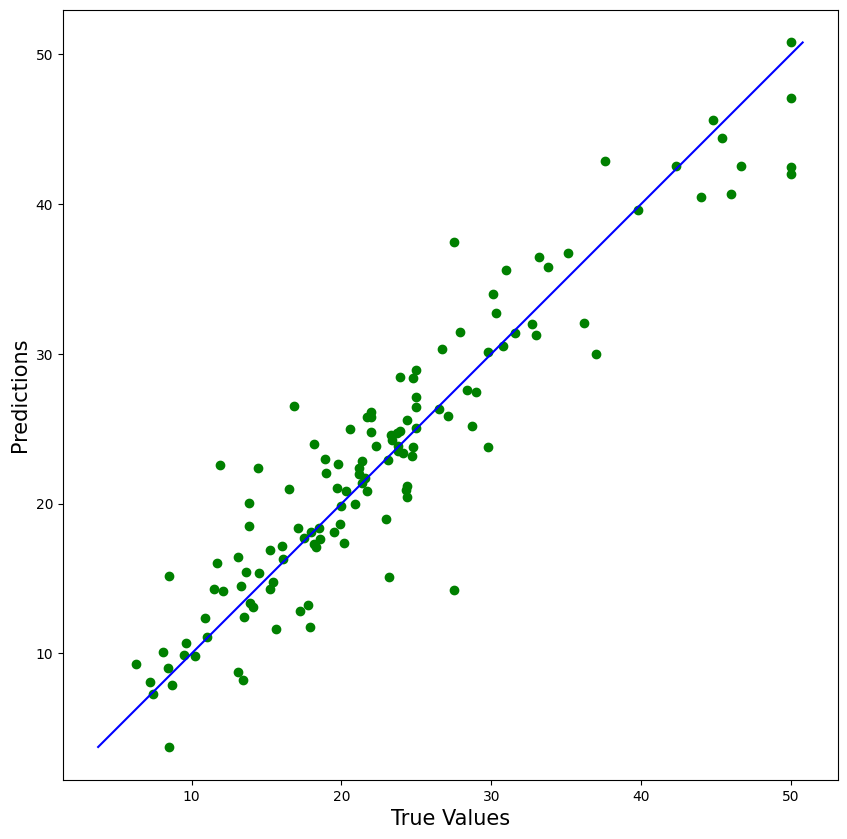

In [191]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='green')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()